In [46]:
import numpy as np
import matplotlib.pyplot as plt

import time

In [104]:
# define a generator function for the polynomial
def generator_function(x,*par):
    return par[0]+par[1]*x+par[2]*x*x+par[3]*x*x*x

# Set the x limits, and the number of points, and calculate the interval
xl = -4.0
xh = 4.0
npoints = 10000

dx = (xh-xl)/npoints

xroots = []
yroots = []
xstep = []
ystep = []

#par = np.array([1.80,-4.05,0.4,1.0])
par = np.array([1.80,-4.05,0.40,1.0])

nroots_expected = 1

In [105]:
# Define the data arrays (x and y)
xval = np.arange(xl,xh,dx)
yval = generator_function(xval,*par)

In [106]:
for nsearch in range(1,int(npoints/2)):
    
    start = time.time()

    niter = npoints/nsearch
    ycomp = yval[0]
    nroots_found = 0

    for i in range(0,int(niter)):
        y = yval[nsearch*i]
        if (y==0):
            if (nsearch == 1):
                print ("Found exact root at x = %f\n" % xval[nsearch*i])
            nroots_found = nroots_found + 1
        if (y*ycomp<0.0):
            xlow = xval[nsearch*(i-1)]
            xhigh = xval[nsearch*i]
            epsilon = 1.0E-10
            diff = 1.0E12
            while (diff>epsilon):
                fa = generator_function(xlow,*par)
                fb = generator_function(xhigh,*par)
                xmid = (xhigh+xlow)/2.0
                fc = generator_function(xmid,*par)
                product = fa*fc
                if (product < 0):
                    xhigh = xmid
                else:
                    xlow = xmid

                diff = np.abs(fc)

            if (nsearch == 1):
                print ("Found root at x = %f\n" % xmid)
            nroots_found = nroots_found + 1
            ycomp = y
        else:
            ycomp = y

    if (nsearch == 1):
        print ("Total number of roots found = %d\n" % nroots_found)
    
    xstep.append(nsearch)
    
    end = time.time()
    
    if (nroots_found == nroots_expected):
        ystep.append(1000.0*(end-start))
    else:
        ystep.append(30)
    

Found root at x = -2.400000

Found root at x = 0.500000

Found root at x = 1.500000

Total number of roots found = 3



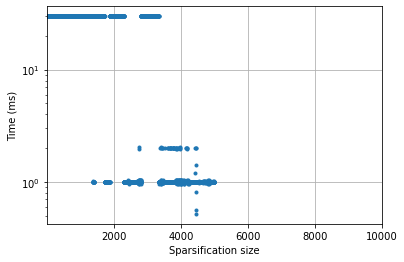

In [107]:
# Generate the figure and the axes 
fig, axs = plt.subplots(nrows=1, ncols=1) 

# On the first axis, plot the sine and label the ordinate
plt.yscale('log')
#plt.xscale('log')
axs.plot(xstep,ystep,'.')
axs.set_ylabel('Time (ms)')
axs.set_xlabel('Sparsification size')
axs.axhline()
plt.grid(True)
axs.set_xlim(1,10000)
plt.show()

Part C:
When the number of data points are adjusted the incontinuity in the graph looks similar but is at different times. It appears uneffected by the changing the coeffeicients. I believe the incontiunity is becuase of the zeros (roots) are being found at the breaks.


In [6]:
# part D
import numpy as np
import matplotlib.pyplot as plt

import time

In [80]:
# define a generator function for the polynomial
def generator_function(x,*par):
    return par[0]+par[1]*x+par[2]*x*x+par[3]*x*x*x

# Set the x limits, and the number of points, and calculate the interval
xl = -10
xh = 10
npoints = 10000

dx = (xh-xl)/npoints

xroots = []
yroots = []
xstep = []
ystep = []

#par = np.array([x_1,x_2,x_3,x_4])
x_1 = float(input('Enter coefficient x_1:\n'))
x_2 = float(input('Enter coefficient x_2:\n'))
x_3 = float(input('Enter coefficient X_3:\n'))
x_4 = float(input('Enter coefficient x_4:\n'))
par = np.array([x_1, x_2, x_3, x_4])


nroots_expected = 1

Enter coefficient x_1:
13
Enter coefficient x_2:
5
Enter coefficient X_3:
-7
Enter coefficient x_4:
1


In [81]:
# Define the data arrays (x and y)
xval = np.arange(xl,xh,dx)
yval = generator_function(xval,*par)

In [82]:
for nsearch in range(1,int(npoints/2)):
    
    start = time.time()

    niter = npoints/nsearch
    ycomp = yval[0]
    nroots_found = 0

    for i in range(0,int(niter)):
        y = yval[nsearch*i]
        if (y==0):
            if (nsearch == 1):
                print ("Found exact root at x = %f\n" % xval[nsearch*i])
            nroots_found = nroots_found + 1
        if (y*ycomp<0.0):
            xlow = xval[nsearch*(i-1)]
            xhigh = xval[nsearch*i]
            epsilon = 1.0E-10
            diff = 1.0E12
            while (diff>epsilon):
                fa = generator_function(xlow,*par)
                fb = generator_function(xhigh,*par)
                xmid = (xhigh+xlow)/2.0
                fc = generator_function(xmid,*par)
                product = fa*fc
                if (product < 0):
                    xhigh = xmid
                else:
                    xlow = xmid

                diff = np.abs(fc)

            if (nsearch == 1):
                print ("Found root at x = %f\n" % xmid)
            nroots_found = nroots_found + 1
            ycomp = y
        else:
            ycomp = y

    if (nsearch == 1):
        print ("Total number of roots found = %d\n" % nroots_found)
    
    xstep.append(nsearch)
    
    end = time.time()
    
    if (nroots_found == nroots_expected):
        ystep.append(1000.0*(end-start))
    else:
        ystep.append(30)

Found root at x = -1.000000

Found root at x = 2.267949

Found root at x = 5.732051

Total number of roots found = 3



I simply added an input for the array parm. This way the user can add different values for the coefficients. I extended the range from -4,4 to -10,10

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
from statsmodels.stats.anova import anova_lm
import scipy.stats as stats
from sklearn.linear_model import LinearRegression

In [ ]:
url = 'https://raw.githubusercontent.com/ZacharyMeador/phys421/master/AltitudeVsDensity%20(2).txt'
df = pd.read_csv(url)
df.head(100)

In [ ]:
df.plot('Altitude','Density',style='o')
plt.ylabel('Density')
plt.title('Density as a Function of Altitude')
plt.show()

In [ ]:
result = sm.ols('Density ~ Altitude',df,).fit()
print (result.summary())

In [ ]:
yint = result.params[0]
slope = result.params[1]

r2 = result.rsquared

print (yint,slope,r2)

In [ ]:
yint = result.params[0]
slope = result.params[1]

r2 = result.rsquared

print (yint,slope,r2)

import seaborn as sns
sns.regplot('Altitude', 'Density', df[:-1], ci=95)


from scipy.optimize import curve_fit

def fitfunction(x,*paramlist):
    return paramlist[0] * np.exp(paramlist[1] * x )

init_vals = [0.0 for x in range(2)]
x = np.array(df['Altitude'][:-1])
y = np.array(df['Density'][:-1])
popt, pcov = curve_fit(fitfunction,x,y,p0=init_vals)

#xi = np.linspace(np.min(x),np.max(x),100)
xi = np.linspace(2.5,5.0,100)
ps = np.random.multivariate_normal(popt,pcov,10000)
ysample=np.asarray([fitfunction(xi,*pi) for pi in ps])
lower = np.percentile(ysample,2.5,axis=0)
upper = np.percentile(ysample,97.5,axis=0)
middle = (lower+upper)/2.0

print("Coefficients (from curve_fit)")
print (popt)
print("Covariance Matrix (from curve_fit)")
print (pcov)

plt.plot(xi,middle)
plt.plot(xi,lower)
plt.plot(xi,upper)
plt.show()

In [ ]:
N_model = 2
v_model = N_model - 1

print (df['Altitude'][:-1])

N = len(df['Altitude'][:-1])
v_total = N - 1
v_error = v_total - v_model

print ("v_total, v_model, v_error = ", v_total,v_model,v_error)

In [ ]:
SS_total = (N-1)*df['Density'][:-1].var()

SS_model = r2*SS_total

SS_error = SS_total - SS_model

print (SS_total, SS_model, SS_error)

In [ ]:
# Proceed with normal ANOVA from here
MS_model = SS_model/v_model
MS_error = SS_error/v_error

fSN = MS_model/MS_error

print ("F Signal/Noise = %0.2f " % fSN)

alpha = 0.05

fdist = stats.f(v_model,v_error)
fhigh = fdist.ppf(1-alpha)

print ("Critical F-value = %0.2f" % (fhigh))

pvalue = (1-fdist.cdf(fSN))
    
print ("Pvalue = %0.3f" % (pvalue))

# print table

print ("Source     df     Sum of Squares Mean Square     f     P-value")
print ("Model      %0.0f       %0.2f           %0.2f        %0.2f    %0.3f" %(v_model,SS_model,MS_model,fSN,pvalue))
print ("Error      %0.0f       %0.2f           %0.2f" %(v_error,SS_error,MS_error))
print ("Total      %0.0f       %0.2f" %(v_total,SS_total))

In [ ]:
yint = result.params[0]
slope = result.params[1]

r2 = result.rsquared

N_model = 2
v_model = N_model - 1

N = len(df['Altitude'])
v_total = N - 1
v_error = v_total - v_model

print ("v_total, v_model, v_error = ", v_total,v_model,v_error)

SS_total = (N-1)*df['Density'].var()

SS_model = r2*SS_total

SS_error = SS_total - SS_model

print (SS_total, SS_model, SS_error)

# Proceed with normal ANOVA from here
MS_model = SS_model/v_model
MS_error = SS_error/v_error

fSN = MS_model/MS_error

print ("F Signal/Noise = %0.2f " % fSN)

alpha = 0.05

fdist = stats.f(v_model,v_error)
fhigh = fdist.ppf(1-alpha)

print ("Critical F-value = %0.2f" % (fhigh))

pvalue = 1-fdist.cdf(fSN)
    
print ("Pvalue = %0.3f" % (pvalue))

# print table

print ("Source     df     Sum of Squares Mean Square     f     P-value")
print ("Model      %0.0f       %0.2f           %0.2f        %0.2f    %0.3f" %(v_model,SS_model,MS_model,fSN,pvalue))
print ("Error      %0.0f       %0.2f           %0.2f" %(v_error,SS_error,MS_error))
print ("Total      %0.0f       %0.2f" %(v_total,SS_total))

I don't know how to fit the curve using the data from the chart. The fit could obviously be better. However, from the data given by the graph we can assume that most data points are within reason. The only questionable data point is the first one. If I could fit the data we could know for certain. I am sure there is a much better way to fit the data.